# Malware Image Classification with CNN
In this notebook I continue working the files harvested from the system32 directory on my machine. My goal is to collect a dataset containing at least 1K images of non dll or exe type files. I will also try and capture a set that is in the range of 200 to 300 px in dimensions to reduce image distortion. This task may be bit harder since some binary type files have names like 'DLL' or 'dat', etc.
I'll start again with my original data set using the same approach as before.

In [1]:
import pandas as pd
df = pd.read_csv('sys32imgs.csv', index_col=0)
df

,path,size,file_name,file_ext,dim,file_type
0,sys32imgs\07409496-a423-4a3e-b620-2cfb01a9318d...,8363,07409496-a423-4a3e-b620-2cfb01a9318d_HyperV-Co...,.png,91,dll
1,sys32imgs\0ae3b998-9a38-4b72-a4c4-06849441518d...,8383,0ae3b998-9a38-4b72-a4c4-06849441518d_Servicing...,.png,91,dll
2,sys32imgs\4545ffe2-0dc4-4df4-9d02-299ef204635e...,8433,4545ffe2-0dc4-4df4-9d02-299ef204635e_hvsocket....,.png,91,dll
3,sys32imgs\69fe178f-26e7-43a9-aa7d-2b616b672dde...,8379,69fe178f-26e7-43a9-aa7d-2b616b672dde_eventlogs...,.png,91,dll
4,sys32imgs\6bea57fb-8dfb-4177-9ae8-42e8b3529933...,8386,6bea57fb-8dfb-4177-9ae8-42e8b3529933_RuntimeDe...,.png,91,dll
...,...,...,...,...,...,...
6862,sys32imgs\{97C9A618-D40C-40EE-8563-8799D0DB987...,8105,{97C9A618-D40C-40EE-8563-8799D0DB9872}~mfencbd...,.png,90,cat
6863,sys32imgs\{A6CE337F-CBA5-412D-A06A-D872F2A8F08...,8105,{A6CE337F-CBA5-412D-A06A-D872F2A8F089}~mfencbd...,.png,90,cat
6864,sys32imgs\{AC93B605-EEAA-4818-9136-9EDA5489749...,6835,{AC93B605-EEAA-4818-9136-9EDA54897497}~mfencbd...,.png,82,cat
6865,sys32imgs\{C03C9921-D1C8-49D2-83C4-162FBC62CCA...,6814,{C03C9921-D1C8-49D2-83C4-162FBC62CCA8}~mfencrk...,.png,82,cat


In [3]:
qf = df.query("dim > 200 and dim < 300 and 'dll' not in file_type and 'exe' not in file_type")
qf

,path,size,file_name,file_ext,dim,file_type
50,sys32imgs\activeds.tlb.png,40407,activeds.tlb.png,.png,201,tlb
201,sys32imgs\backup.sdb.png,48946,backup.sdb.png,.png,221,sdb
223,sys32imgs\bdaplgin.ax.png,69822,bdaplgin.ax.png,.png,264,ax
262,sys32imgs\boot.sdi.png,83153,boot.sdi.png,.png,288,sdi
624,sys32imgs\C_10001.NLS.png,45950,C_10001.NLS.png,.png,214,NLS
...,...,...,...,...,...,...
6531,sys32imgs\winrm.vbs.png,44910,winrm.vbs.png,.png,211,vbs
6698,sys32imgs\wscui.cpl.png,51326,wscui.cpl.png,.png,226,cpl
6701,sys32imgs\WSDPrintProxy.DLL.png,43757,WSDPrintProxy.DLL.png,.png,209,DLL
6712,sys32imgs\wshom.ocx.png,72110,wshom.ocx.png,.png,268,ocx


In [6]:
qf['file_type'].value_counts()

cat    66
NLS    18
ax      9
cpl     4
DLL     4
ocx     3
nls     2
scr     2
bin     1
tsp     1
dat     1
tlb     1
acm     1
sdb     1
uce     1
com     1
DAT     1
png     1
sdi     1
vbs     1
Name: file_type, dtype: int64

In [7]:
qf = df.query("'dll' not in file_type and 'exe' not in file_type")
qf

,path,size,file_name,file_ext,dim,file_type
5,sys32imgs\@AdvancedKeySettingsNotification.png...,2648,@AdvancedKeySettingsNotification.png.png,.png,51,png
6,sys32imgs\@AppHelpToast.png.png,308,@AppHelpToast.png.png,.png,17,png
7,sys32imgs\@AudioToastIcon.png.png,374,@AudioToastIcon.png.png,.png,19,png
8,sys32imgs\@BackgroundAccessToastIcon.png.png,530,@BackgroundAccessToastIcon.png.png,.png,23,png
9,sys32imgs\@bitlockertoastimage.png.png,278,@bitlockertoastimage.png.png,.png,16,png
...,...,...,...,...,...,...
6862,sys32imgs\{97C9A618-D40C-40EE-8563-8799D0DB987...,8105,{97C9A618-D40C-40EE-8563-8799D0DB9872}~mfencbd...,.png,90,cat
6863,sys32imgs\{A6CE337F-CBA5-412D-A06A-D872F2A8F08...,8105,{A6CE337F-CBA5-412D-A06A-D872F2A8F089}~mfencbd...,.png,90,cat
6864,sys32imgs\{AC93B605-EEAA-4818-9136-9EDA5489749...,6835,{AC93B605-EEAA-4818-9136-9EDA54897497}~mfencbd...,.png,82,cat
6865,sys32imgs\{C03C9921-D1C8-49D2-83C4-162FBC62CCA...,6814,{C03C9921-D1C8-49D2-83C4-162FBC62CCA8}~mfencrk...,.png,82,cat


In [8]:
qf['file_type'].value_counts()

cat    2283
DLL     223
NLS     112
png      66
cpl      18
       ... 
iec       1
gif       1
chk       1
wim       1
dtd       1
Name: file_type, Length: 66, dtype: int64

In [9]:
qf = df.query("'cat' in file_type")
qf

,path,size,file_name,file_ext,dim,file_type
208,sys32imgs\BatteryWidgetAddin.cat.png,9315,BatteryWidgetAddin.cat.png,.png,96,cat
506,sys32imgs\Containers-ApplicationGuard-Package~...,7312,Containers-ApplicationGuard-Package~31bf3856ad...,.png,85,cat
507,sys32imgs\Containers-ApplicationGuard-Package~...,7205,Containers-ApplicationGuard-Package~31bf3856ad...,.png,84,cat
508,sys32imgs\Containers-ApplicationGuard-Package~...,7263,Containers-ApplicationGuard-Package~31bf3856ad...,.png,85,cat
509,sys32imgs\Containers-ApplicationGuard-Package~...,7425,Containers-ApplicationGuard-Package~31bf3856ad...,.png,86,cat
...,...,...,...,...,...,...
6862,sys32imgs\{97C9A618-D40C-40EE-8563-8799D0DB987...,8105,{97C9A618-D40C-40EE-8563-8799D0DB9872}~mfencbd...,.png,90,cat
6863,sys32imgs\{A6CE337F-CBA5-412D-A06A-D872F2A8F08...,8105,{A6CE337F-CBA5-412D-A06A-D872F2A8F089}~mfencbd...,.png,90,cat
6864,sys32imgs\{AC93B605-EEAA-4818-9136-9EDA5489749...,6835,{AC93B605-EEAA-4818-9136-9EDA54897497}~mfencbd...,.png,82,cat
6865,sys32imgs\{C03C9921-D1C8-49D2-83C4-162FBC62CCA...,6814,{C03C9921-D1C8-49D2-83C4-162FBC62CCA8}~mfencrk...,.png,82,cat


In [11]:
qf.dim.value_counts()

85     642
86     279
84     198
87     169
88     128
      ... 
524      1
343      1
437      1
317      1
322      1
Name: dim, Length: 205, dtype: int64

<Axes: >

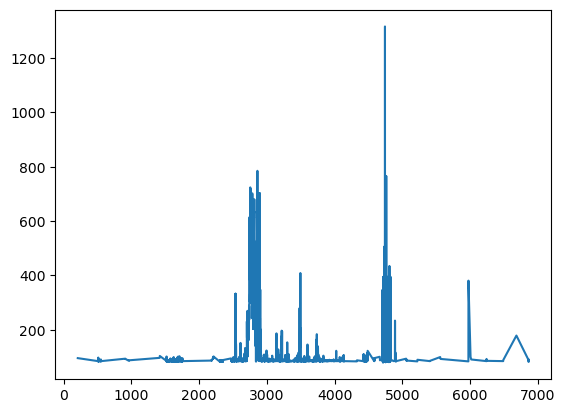

In [10]:
qf.dim.plot()

I use the plot to adjust my filter query to get into range of suitable for dimensions of 150 x 150.

In [15]:
qf = df.query("dim > 80 and dim < 300 and 'cat' in file_type")
qf

,path,size,file_name,file_ext,dim,file_type
208,sys32imgs\BatteryWidgetAddin.cat.png,9315,BatteryWidgetAddin.cat.png,.png,96,cat
506,sys32imgs\Containers-ApplicationGuard-Package~...,7312,Containers-ApplicationGuard-Package~31bf3856ad...,.png,85,cat
507,sys32imgs\Containers-ApplicationGuard-Package~...,7205,Containers-ApplicationGuard-Package~31bf3856ad...,.png,84,cat
508,sys32imgs\Containers-ApplicationGuard-Package~...,7263,Containers-ApplicationGuard-Package~31bf3856ad...,.png,85,cat
509,sys32imgs\Containers-ApplicationGuard-Package~...,7425,Containers-ApplicationGuard-Package~31bf3856ad...,.png,86,cat
...,...,...,...,...,...,...
6862,sys32imgs\{97C9A618-D40C-40EE-8563-8799D0DB987...,8105,{97C9A618-D40C-40EE-8563-8799D0DB9872}~mfencbd...,.png,90,cat
6863,sys32imgs\{A6CE337F-CBA5-412D-A06A-D872F2A8F08...,8105,{A6CE337F-CBA5-412D-A06A-D872F2A8F089}~mfencbd...,.png,90,cat
6864,sys32imgs\{AC93B605-EEAA-4818-9136-9EDA5489749...,6835,{AC93B605-EEAA-4818-9136-9EDA54897497}~mfencbd...,.png,82,cat
6865,sys32imgs\{C03C9921-D1C8-49D2-83C4-162FBC62CCA...,6814,{C03C9921-D1C8-49D2-83C4-162FBC62CCA8}~mfencrk...,.png,82,cat


## Prepare Selection
Now that I've identified my non binary files. I will create a hash feature for each file should I need to identify the source file at a later time. Then I will continue to process my data set for training with a CNN. 

In [19]:
import hashlib
def hashFile(path):
    return hashlib.md5(open(path,'rb').read()).hexdigest()

In [20]:
qf['md5'] = qf['path'].apply(lambda x: hashFile(x))
qf

C:\Users\genem\AppData\Local\Temp\ipykernel_1256\3075359266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qf['md5'] = qf['path'].apply(lambda x: hashFile(x))


,path,size,file_name,file_ext,dim,file_type,md5
208,sys32imgs\BatteryWidgetAddin.cat.png,9315,BatteryWidgetAddin.cat.png,.png,96,cat,3f08ffce1a59a3a1dd1b2cc1f376881b
506,sys32imgs\Containers-ApplicationGuard-Package~...,7312,Containers-ApplicationGuard-Package~31bf3856ad...,.png,85,cat,2605f90b8b803b0d8093c84e9c9b7cb4
507,sys32imgs\Containers-ApplicationGuard-Package~...,7205,Containers-ApplicationGuard-Package~31bf3856ad...,.png,84,cat,6cfc42c37dcff85168682160d592c3d0
508,sys32imgs\Containers-ApplicationGuard-Package~...,7263,Containers-ApplicationGuard-Package~31bf3856ad...,.png,85,cat,f0bc379b2212a3885259fd8c34720d5e
509,sys32imgs\Containers-ApplicationGuard-Package~...,7425,Containers-ApplicationGuard-Package~31bf3856ad...,.png,86,cat,aa24d9bdaec878e2e86c11a2dd35a9f3
...,...,...,...,...,...,...,...
6862,sys32imgs\{97C9A618-D40C-40EE-8563-8799D0DB987...,8105,{97C9A618-D40C-40EE-8563-8799D0DB9872}~mfencbd...,.png,90,cat,25de8e0ecb1f47a7ad54f2301b81bc86
6863,sys32imgs\{A6CE337F-CBA5-412D-A06A-D872F2A8F08...,8105,{A6CE337F-CBA5-412D-A06A-D872F2A8F089}~mfencbd...,.png,90,cat,25de8e0ecb1f47a7ad54f2301b81bc86
6864,sys32imgs\{AC93B605-EEAA-4818-9136-9EDA5489749...,6835,{AC93B605-EEAA-4818-9136-9EDA54897497}~mfencbd...,.png,82,cat,e9ee343b7ba6d31c0f632c46ae219c97
6865,sys32imgs\{C03C9921-D1C8-49D2-83C4-162FBC62CCA...,6814,{C03C9921-D1C8-49D2-83C4-162FBC62CCA8}~mfencrk...,.png,82,cat,7a650afb2040f5e7e655ea9fe5170799


Check to make sure I have a good data set.

In [21]:
qf.isna().value_counts()

path   size   file_name  file_ext  dim    file_type  md5  
False  False  False      False     False  False      False    2154
dtype: int64

In [22]:
qf.to_csv('cFileSelection.csv')

## Continue Processing

In [23]:
df = pd.read_csv('cFileSelection.csv', index_col=0)
df

,path,size,file_name,file_ext,dim,file_type,md5
208,sys32imgs\BatteryWidgetAddin.cat.png,9315,BatteryWidgetAddin.cat.png,.png,96,cat,3f08ffce1a59a3a1dd1b2cc1f376881b
506,sys32imgs\Containers-ApplicationGuard-Package~...,7312,Containers-ApplicationGuard-Package~31bf3856ad...,.png,85,cat,2605f90b8b803b0d8093c84e9c9b7cb4
507,sys32imgs\Containers-ApplicationGuard-Package~...,7205,Containers-ApplicationGuard-Package~31bf3856ad...,.png,84,cat,6cfc42c37dcff85168682160d592c3d0
508,sys32imgs\Containers-ApplicationGuard-Package~...,7263,Containers-ApplicationGuard-Package~31bf3856ad...,.png,85,cat,f0bc379b2212a3885259fd8c34720d5e
509,sys32imgs\Containers-ApplicationGuard-Package~...,7425,Containers-ApplicationGuard-Package~31bf3856ad...,.png,86,cat,aa24d9bdaec878e2e86c11a2dd35a9f3
...,...,...,...,...,...,...,...
6862,sys32imgs\{97C9A618-D40C-40EE-8563-8799D0DB987...,8105,{97C9A618-D40C-40EE-8563-8799D0DB9872}~mfencbd...,.png,90,cat,25de8e0ecb1f47a7ad54f2301b81bc86
6863,sys32imgs\{A6CE337F-CBA5-412D-A06A-D872F2A8F08...,8105,{A6CE337F-CBA5-412D-A06A-D872F2A8F089}~mfencbd...,.png,90,cat,25de8e0ecb1f47a7ad54f2301b81bc86
6864,sys32imgs\{AC93B605-EEAA-4818-9136-9EDA5489749...,6835,{AC93B605-EEAA-4818-9136-9EDA54897497}~mfencbd...,.png,82,cat,e9ee343b7ba6d31c0f632c46ae219c97
6865,sys32imgs\{C03C9921-D1C8-49D2-83C4-162FBC62CCA...,6814,{C03C9921-D1C8-49D2-83C4-162FBC62CCA8}~mfencrk...,.png,82,cat,7a650afb2040f5e7e655ea9fe5170799


In [26]:
# Importing Image class from PIL module 
from PIL import Image 
import pathlib
def resizeIM(im_path, save_path, file_name):
    try:
        # Opens a image in RGB mode
        im = Image.open(im_path)
        newsize = (150, 150)
        im1 = im.resize(newsize)
        file_name = str(file_name) + '.png'
        save_path = save_path + "\\" + pathlib.PureWindowsPath(file_name).name
        im1.save(save_path)
    except Exception as e:
        print(e)

In [28]:
counter = 0
for index, row in df.iterrows():
    path = row['path']
    resizeIM(path, "cFiles", index)
    counter += 1
print(counter)

2154


# Reference
1 Windows Catalog File. (n.d.). [Data set].

